**Table of contents**<a id='toc0_'></a>    
- [ANN numpy from scratch](#toc1_)    
    - [activation function](#toc1_1_1_)    
    - [derivation function](#toc1_1_2_)    
  - [feedforward](#toc1_2_)    
  - [backprop](#toc1_3_)    
  - [Network](#toc1_4_)    
  - [testing](#toc1_5_)    
  - [Visualizing](#toc1_6_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

this notebook for practice and understand about how ann work

In [1]:
import numpy as np

In [1]:
import numpy as np

# Define the 3-dimensional vector
vector = np.array([1, 2, 3])

# Define a 4x3 matrix
matrix = np.array([[4, 5, 6],
                   [7, 8, 9],
                   [10, 11, 12],
                   [13, 14, 15]])


[[ 4 10 18]
 [ 7 16 27]
 [10 22 36]
 [13 28 45]]


In [2]:
vector*matrix

array([[ 4, 10, 18],
       [ 7, 16, 27],
       [10, 22, 36],
       [13, 28, 45]])

In [3]:
a = np.array([4, 5, 6])

In [6]:
np.cross(vector, a)

array([[-3,  6, -3]])

In [5]:
np.cross(vector, matrix)

array([[ -3,   6,  -3],
       [ -6,  12,  -6],
       [ -9,  18,  -9],
       [-12,  24, -12]])

In [ ]:
# class mlp_numpy

dotproduct can tell similarity of vector but there are many vector that can get the same answer (both different magnitude and angle)

is there better way to represent different of patterns, is one number is enough? why we reconize anything 

suggestion
1. crossproduct - the value is oposite to dotproduct can tell how different ,also represent direction / no dimension reduce = no use?
2. 



# <a id='toc1_'></a>[ANN numpy from scratch](#toc0_)

learning

https://towardsdatascience.com/coding-a-neural-network-from-scratch-in-numpy-31f04e4d605  
https://www.3blue1brown.com/lessons/backpropagation-calculus

### <a id='toc1_1_1_'></a>[activation function](#toc0_)

apply linear or something that basic math operation won't do  

<img src="figure/activation-function.png" style="width: 500px;" />


softmax 

$$P(y = c \mid \boldsymbol{\theta}) = \frac{e^{\boldsymbol{\theta}^{T}_c\mathbf{x}}}{\Sigma_{i=1}^{k} e^{\boldsymbol{\theta}_k^{T}\mathbf{x}}}$$

In [19]:
# example code

def sigmoid(Z):

    return (1/(1+np.exp(Z)))

def relu(Z):

    return Z.clip(min=0)

def softmax(Z):

    exp_scores = np.exp(Z)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

    return probs

def tanh(Z):
    A = np.tanh(Z)
    return A

### <a id='toc1_1_2_'></a>[derivation function](#toc0_)

changing of f(x) base on x

<img src="figure/Derivation_func.png" style="width: 500px;" />

https://towardsdatascience.com/derivative-of-the-softmax-function-and-the-categorical-cross-entropy-loss-ffceefc081d1  

![image.png](attachment:image.png)  

![image-8.png](attachment:image-8.png)

* we don't need to use this jacobian softmax in classification backprop because after do many math derivative of loss by input of softmax (can call projection or linear function or dot product) will be like (prediction - label) which much easier for calculation 

![image-9.png](attachment:image-9.png)

In [18]:
# example derivative function
def Linear_derivative(x):
    output = np.ones(np.shape(x))
    return output

def Sigmoid_derivative(x):
    output = sigmoid(x)*(1-sigmoid(x)) 
    return output

def ReLu_derivative(x):
    output = (x>0)*1
    return output

def Tanh_derivative(x):
    output = 1 - np.square(tanh(x))
    return output



## <a id='toc1_2_'></a>[feedforward](#toc0_)

w represent how x affect the next node the result can see as another thing value,  
or we can see w as pattern value and result is similarity od weight and input. 

<img src="figure/feedforward.png" style="width: 500px;" />

In [ ]:
# example code for Forward propagation
def FFN(inputs, weights, bias, ac):
    """

    return: result after activation, result after dot product
    """
    Z = np.dot(inputs, weights.T) + bias

    A = ac(inputs=Z)

    return A, Z

## <a id='toc1_3_'></a>[backprop](#toc0_)

find how each parameter (w and b) affect the loss. then use that value to adjust the parameter to minimize the loss


* chain-rule 

c is loss


<img src="figure/chain-rule-breakdown.svg" style="width: 500px;" />    



<img src="figure/layer_curr.png" style="width: 300px;" />        

<img src="figure/tree-extended.png" style="width: 300px;" />

<img src="figure/jacobian.png" style="width: 300px;" />

## <a id='toc1_4_'></a>[Network](#toc0_)

In [259]:
# full nueral network class

class ANN:

    """
    architect: list of layer from input to output ex. [3,6,4,1]
    task: classification or regression (this will select the last layer activation softmax or linear)


    """

    def __init__(self,architecture,task="classification"):
        
        self.architecture=architecture
        self.params = self.init_weight()

        self.task = task

        self.memory = []



    def init_weight(self):

        np.random.seed(96)

        params = []
        for i in range(len(self.architecture[:-1])):
            w = np.random.uniform(low=-1, high=1, size=(self.architecture[i+1],self.architecture[i]))
            b = np.zeros((1, self.architecture[i+1]))
            params.append(np.concatenate((w,b.T),axis=1))

        return params
        
    def forward(self,inputs):

        assert inputs.shape[1] == self.architecture[0]
        
        A = inputs
        # hidden layer
        for param in self.params[:-1]:
            
            # concat 1 as bias
            A = np.concatenate((A,np.ones((A.shape[0],1))),axis=1)
            Z = A @ param.T
            self.memory.append({"inputs":A,"Z":Z})

            A = self.relu(Z)

            

        # last layer
        A = np.concatenate((A,np.ones((A.shape[0],1))),axis=1)
        Z = A @ self.params[-1].T
        self.memory.append({"inputs":A,"Z":Z})

        if self.task == "classification":
            A = self.softmax(Z)

        else:
            A = Z


        return A
        
    def backprop(self,predicted,actual,lr=0.001,):

        num_samples = len(actual)

        ## dL/dZ = S-Y from now on dZ mean dL/dZ fun fact dL/dZ for linear regression with mse loss and softmax with CrossEntropy is the same! they already think for this lol
        
        if self.task == "classification":
            dscores = predicted.copy() # be careful array like data will share same address if we not copy (anything change dscores will change predicted too)
            dscores[range(num_samples),actual] -= 1 # -1 on S at position actual label
            dZ = dscores/num_samples # get average gradient
            # shape(m,num_class)
        else:
            dscores = predicted-actual
            dZ = dscores/num_samples
            # shape(m,1)

        # loop from last layer to first
        for idx, param in reversed(list(enumerate(self.params))):
            

            Z = self.memory[idx]['Z']
            # shape (m,n_curr)

            # find dZ =====================================================================================================================
            # last layer (softmax) we basically skip dL/dA because we find dL/dZ instead
            if idx < len(self.params[:-1]):
                # dL/dZ = dL/da * da/dZ => relu(Z) = a => d_relu(Z)*1 = da/dZ 
                dZ = self.d_relu(Z)*dA
                # shape (m,n_curr) 


            # find dW db dA ===============================================================================================================
            # dL/dW = dL/dZ * dZ/dW  => Z = w*x => dZ/dW = x  (x mean input) 
            inputs = self.memory[idx]['inputs'] 
            dW = dZ.T @  inputs
            # shape  (m,n_curr).T (m,n_prev) => (n_cur,n_prev)

            # dL/db = dL/dZ * dZ/db => z= w*x+b => dZ/db = 1  because we concate input with 1 so bias is like part of weight so no need to calculate

            # dL/dA_prev = dL/dZ * dZ/dA_prev => Z = w*x => (dZ/dx or dZ/dA_prev) = w /don't dorget we need to slice last col out because it bias not really weight
            # dA mean dA of previous layer this is for calculate gradient for previous layer
            dA = dZ @ param[:, :-1]
            # shape (m,n_curr) (n_curr,n_prev+1) => (m,n_prev+1)
            

            # update =====================================================================
            self.params[idx] -= lr*dW

        #clear memory
        self.memory = []

    def relu(self,Z):

        return Z.clip(min=0)
    
    def d_relu(self,Z):
        
        return (Z>0)
    
    def softmax(self,Z):

        # use log sum exp instead of exp exp_scores = np.exp(Z) to improve stability
        exp_scores = np.exp(Z - np.max(Z, axis=1, keepdims=True))

        return exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    
    def numpy_onehot_encoder(self,y):
        y_hot = np.zeros((y.size, self.architecture[-1]))
        y_hot[np.arange(y.size), y] = 1
        return y_hot
    
    def onehot_to_label(self,y_hot):
        return np.argmax(y_hot, axis=1)
    
    def CrossEntropy(self,predicted,actual):
        # predicted shape (m,c) actual shape (m,)
        y_hot = self.numpy_onehot_encoder(actual)
        return - np.sum(y_hot*np.log(predicted)) / y_hot.shape[0]

    def MSE(self,predicted,actual):
        # predicted shape (m,1)
        return np.sum(((actual-predicted)**2)[0]) / predicted.shape[0] 
    
    def R2(self,predicted,actual,y_mean):
        
        return 1 - (np.sum(((actual-predicted)**2)[0])/np.sum(((actual-y_mean)**2)[0]))


    def correct(self,predicted,actual):
        pred_cls = self.onehot_to_label(predicted)
        correct = sum(pred_cls==actual)
        return correct

    # def train_classification(self,
    #           X,
    #           y,
    #           epoch,
    #           lr=0.01,
    #           batch_size=1,
    #           show_epoch=1):
        

    #     n_sample = X.shape[0] 

    #     for ep in range(epoch):

    #         total_loss = 0.0
    #         total_correct = 0

    #         for i in range(0,X.shape[0],batch_size):

    #             inputs = X[i:i+batch_size]
    #             labels = y[i:i+batch_size]

    #             pred = self.forward(inputs)

    #             self.backprop(pred,labels,lr)

    #             if self.task == "classification":
    #                 loss = self.CrossEntropy(pred,labels)
    #             else:
    #                 loss = self.MSE(pred,labels)

    #             correct = self.correct(pred,labels)

    #             total_correct+=correct
    #             total_loss+=loss


    #         epoch_train_acc = (total_correct/n_sample)*100
    #         epoch_train_loss = total_loss/n_sample

    #         if ep%show_epoch == show_epoch-1:

    #             print(f"Epoch: {ep+1} | Train acc: {epoch_train_acc:3.2f} | Train Loss: {epoch_train_loss:3.4f}")

   

            


        
    
        

    

## <a id='toc1_5_'></a>[testing](#toc0_)

In [161]:
import numpy as np

In [260]:
# classification data
from sklearn.datasets import load_diabetes,load_iris

data = load_iris()
print(data.feature_names)

X,y = data.data, data.target

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [261]:
X.shape,y.shape,set(y)

((150, 4), (150,), {0, 1, 2})

In [29]:
# X = X[:,:-1]

In [267]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [268]:
import numpy as np
model = ANN([4,6,3])

In [269]:
epoch = 100
batch_size = 5
show_epoch = 10
lr = 0.01
n_sample = X_train.shape[0]

for ep in range(epoch):

    total_loss = 0.0
    total_correct = 0

    for i in range(0,X_train.shape[0],batch_size):

        inputs = X_train[i:i+batch_size]
        labels = y_train[i:i+batch_size]

        pred =model.forward(inputs)
        
        model.backprop(pred,labels,lr)
 

        loss = model.CrossEntropy(pred,labels)


        correct = model.correct(pred,labels)

        total_correct+=correct
        total_loss+=loss


    epoch_train_acc = (total_correct/n_sample)*100
    epoch_train_loss = total_loss/n_sample

    if ep%show_epoch == show_epoch-1:

        print(f"Epoch: {ep+1} | Train acc: {epoch_train_acc:3.2f} | Train Loss: {epoch_train_loss:3.4f}")





Epoch: 10 | Train acc: 51.43 | Train Loss: 0.1650
Epoch: 20 | Train acc: 86.67 | Train Loss: 0.0999
Epoch: 30 | Train acc: 90.48 | Train Loss: 0.0741
Epoch: 40 | Train acc: 91.43 | Train Loss: 0.0601
Epoch: 50 | Train acc: 93.33 | Train Loss: 0.0502
Epoch: 60 | Train acc: 92.38 | Train Loss: 0.0430
Epoch: 70 | Train acc: 93.33 | Train Loss: 0.0379
Epoch: 80 | Train acc: 93.33 | Train Loss: 0.0342
Epoch: 90 | Train acc: 93.33 | Train Loss: 0.0315
Epoch: 100 | Train acc: 93.33 | Train Loss: 0.0295


In [299]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("../a1-car_price_prediction/datasets/Cars.csv")

# clean data
df['max_power'] = df['max_power'].str.extract(r'([\d.]+)').astype(float)
df['engine'] = df['engine'].str.extract('(\d+)').astype(float).astype(pd.Int64Dtype(), errors='ignore')
df['mileage'] = df['mileage'].str.extract(r'([\d.]+)').astype(float)

feature_names = ['engine','max_power','mileage','year']

X = df[feature_names]
y = df["selling_price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 96)

#preprocessing
# permutation
X_train['engine'].fillna(X_train['engine'].median(), inplace=True)
X_train['max_power'].fillna(X_train['max_power'].mean(), inplace=True)
X_train['mileage'].fillna(X_train['mileage'].mean(),inplace=True)

X_test['engine'].fillna(X_test['engine'].median(), inplace=True)
X_test['max_power'].fillna(X_test['max_power'].mean(), inplace=True)
X_test['mileage'].fillna(X_test['mileage'].mean(), inplace=True)

# log tranform y
y_train = np.log(y_train)

# to numpy
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()



scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

In [300]:
y_mean = sum(y_train)/len(y_train)
y_train = np.expand_dims(y_train,axis=1)

In [301]:
X_train.shape

(6096, 4)

In [302]:
model = ANN([4,8,1],task="regression")

In [303]:
epoch = 1000
batch_size = 6096 # batch size is affect a lot don't know why 
show_epoch = 100
lr = 0.01
n_sample = X_train.shape[0]


for ep in range(epoch):

    total_mse = 0.0
    total_r2 = 0.0

    for i in range(0,X_train.shape[0],batch_size):

        inputs = X_train[i:i+batch_size]
        labels = y_train[i:i+batch_size]

        pred =model.forward(inputs)
        
        model.backprop(pred,labels,lr)
 

        loss = model.MSE(pred,labels)
        r2 = model.R2(pred,labels,y_mean)



        total_mse+=loss*pred.shape[0] 
        total_r2+=r2*pred.shape[0] 

    epoch_train_r2 = total_r2/n_sample
    epoch_train_mse = total_mse/n_sample

    if ep%show_epoch == show_epoch-1:

        print(f"Epoch: {ep+1} | Train MSE: {epoch_train_mse:3.4f} | Train r2: {epoch_train_r2:3.4f}")





Epoch: 100 | Train MSE: 0.0000 | Train r2: 0.9990
Epoch: 200 | Train MSE: 0.0000 | Train r2: 0.9249
Epoch: 300 | Train MSE: 0.0001 | Train r2: 0.8976
Epoch: 400 | Train MSE: 0.0001 | Train r2: 0.8847
Epoch: 500 | Train MSE: 0.0001 | Train r2: 0.8745
Epoch: 600 | Train MSE: 0.0001 | Train r2: 0.8684
Epoch: 700 | Train MSE: 0.0001 | Train r2: 0.8635
Epoch: 800 | Train MSE: 0.0001 | Train r2: 0.8612
Epoch: 900 | Train MSE: 0.0001 | Train r2: 0.8592
Epoch: 1000 | Train MSE: 0.0001 | Train r2: 0.8579


In [ ]:
arr

## <a id='toc1_6_'></a>[Visualizing](#toc0_)

this is the fun part because we can see the weight

In [353]:
# classification data
from sklearn.datasets import load_diabetes,load_iris

data = load_iris()
print(data.feature_names)

X,y = data.data, data.target

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [354]:
X = X[:,:-1]

In [355]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [356]:
X_train.shape

(105, 3)

In [357]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_3d_vectors(vectors):
    """
    Plots 3D vectors from a NumPy array with shape (m, 3) with magnitude representation.

    Parameters:
        vectors (numpy.ndarray): Array of shape (m, 3) containing 3D vectors.

    Returns:
        None
    """
    # Create a 3D figure
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Add the origin point
    ax.scatter([0], [0], [0], color='red', s=100, label='Origin')

    # Loop through the rows of the input array
    for vector in vectors:
        x, y, z = vector
        ax.quiver(0, 0, 0, x, y, z, color='b', label=f'({x}, {y}, {z})', arrow_length_ratio=0.1)

        # Add a dashed line to represent magnitude
        ax.plot([0, x], [0, y], [0, z], 'r--')

    # Set labels and limits
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

    # Add a legend
    ax.legend()

    # Show the plot
    plt.show()


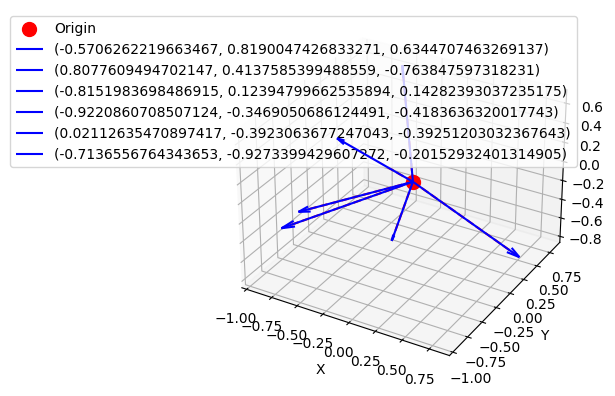

In [358]:
import numpy as np
model = ANN([3,6,6,3])
plot_3d_vectors(model.params[0][:,:-1])

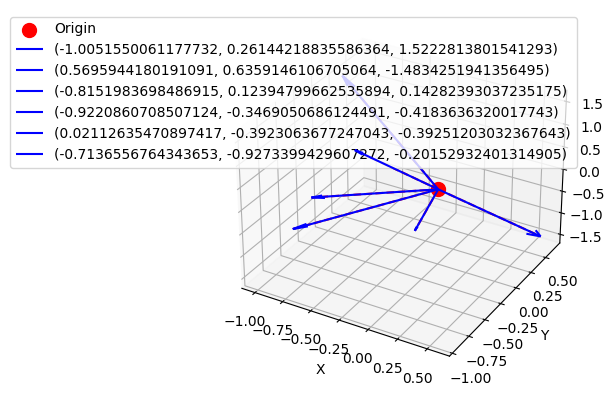

Epoch: 20 | Train acc: 78.10 | Train Loss: 0.0803


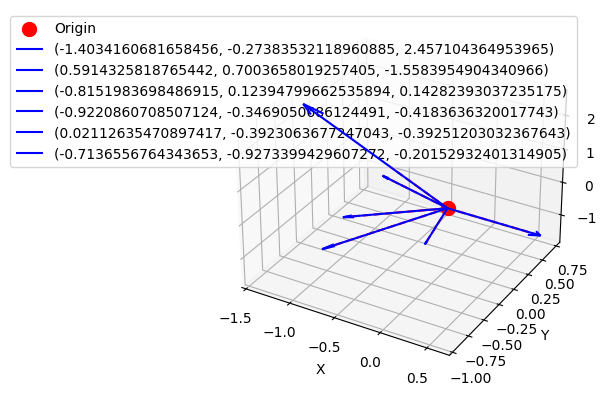

Epoch: 40 | Train acc: 84.76 | Train Loss: 0.0620


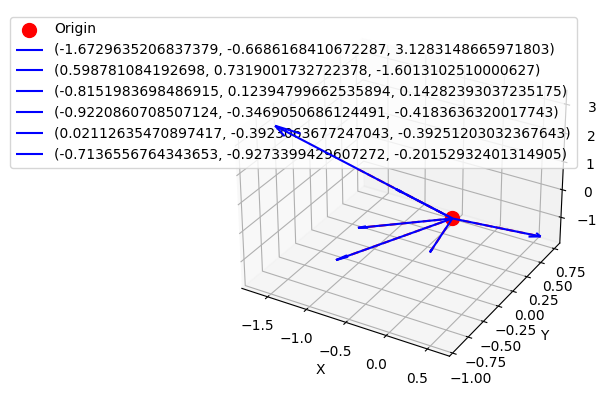

Epoch: 60 | Train acc: 89.52 | Train Loss: 0.0540


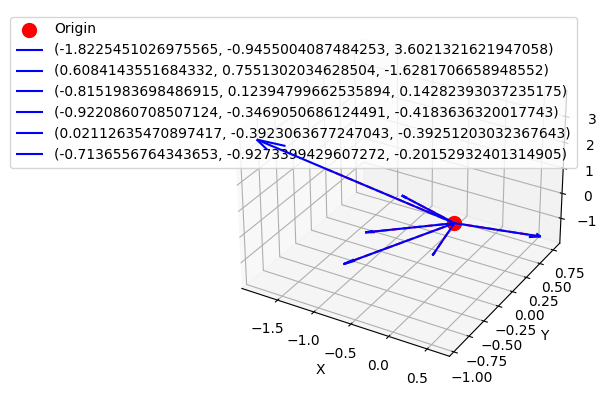

Epoch: 80 | Train acc: 89.52 | Train Loss: 0.0485


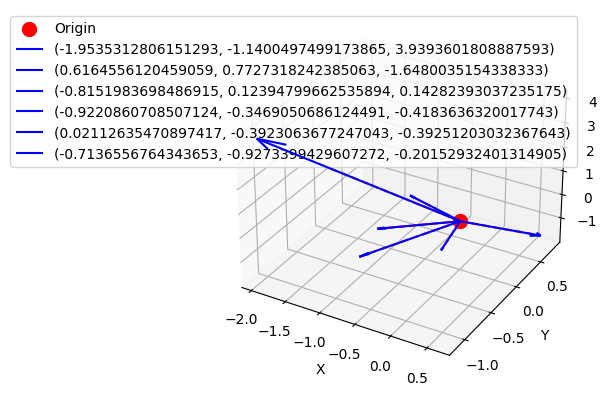

Epoch: 100 | Train acc: 89.52 | Train Loss: 0.0460


In [359]:
epoch = 100
batch_size = 5
show_epoch = 20
lr = 0.05
n_sample = X_train.shape[0]

for ep in range(epoch):

    total_loss = 0.0
    total_correct = 0

    for i in range(0,X_train.shape[0],batch_size):

        inputs = X_train[i:i+batch_size]
        labels = y_train[i:i+batch_size]

        pred =model.forward(inputs)
        
        model.backprop(pred,labels,lr)
 

        loss = model.CrossEntropy(pred,labels)


        correct = model.correct(pred,labels)

        total_correct+=correct
        total_loss+=loss


    epoch_train_acc = (total_correct/n_sample)*100
    epoch_train_loss = total_loss/n_sample

    if ep%show_epoch == show_epoch-1:
        plot_3d_vectors(model.params[0][:,:-1])

        print(f"Epoch: {ep+1} | Train acc: {epoch_train_acc:3.2f} | Train Loss: {epoch_train_loss:3.4f}")



In [360]:
arr

NameError: name 'arr' is not defined

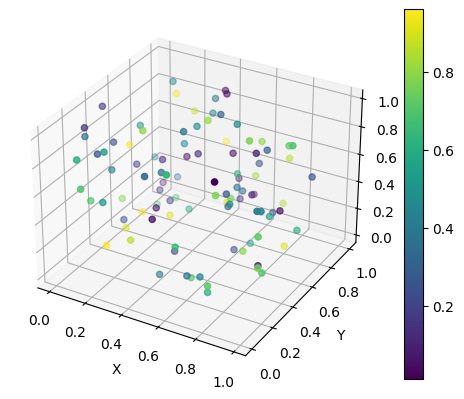

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Generate some sample 4D data
np.random.seed(0)
x = np.random.rand(100)
y = np.random.rand(100)
z = np.random.rand(100)
w = np.random.rand(100)

# Create a scatter plot with color representing the fourth dimension
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(x, y, z, c=w, cmap='viridis', s=20)

# Add colorbar
fig.colorbar(scatter)

# Set labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Show the plot
plt.show()
